# Caso Limpieza de Sueldos de San Francisco

Después del análisis de datos que usted realizó sobre la nómina de sueldos de San Francisco, el alcalde notó los errores de datos que existían y los problemas que acarrean a la gestión. Por este motivo, decidió contratarlo para que haga un análisis de la calidad de datos y realice la limpieza de datos a efecto de contar con información confiable para la toma de decisiones. 


Como entregable, se solicita un notebook ordenado, documentado y reproducible en donde:

1. Realice un análisis de valores nulos en las columnas BasePay, OverTimePay, OtherPay, Benefits, TotalPay y TotalPayBenefits
2. Realice un análisis de outliers en la columna BasePay
3. Realice la limpieza de los datos de acuerdo a los criterios aprendidos (dejar, imputar, eliminar)
4. Genere un nuevo archivo Excel con los datos limpios

In [1]:
# importe de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# carga de archivo CSV
df = pd.read_csv('Salaries.csv')

## Analisis de valores nulos en columnas de interes
BasePay, OverTimePay, OtherPay, Benefits, TotalPay y TotalPayBenefits

In [3]:
# verificación por columna
columnas = [
    'BasePay',
    'OvertimePay',
    'OtherPay',
    'Benefits',
    'TotalPay',
    'TotalPayBenefits'
]

df[columnas].isnull().sum()

BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
dtype: int64

In [4]:
# missing tokens:
missing_tokens = ["--", "n/a", "na", "NA", "NaN", ""]
df = df.replace(missing_tokens, np.nan)

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
# verificar cambios
df[columnas].isnull().sum()

BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
dtype: int64

In [6]:
# verificar duplicados
duplicadas = df.duplicated().sum()
print("Filas duplicadas:", duplicadas)

Filas duplicadas: 0


## Limpieza de datos

In [10]:
# cambiar valores nulos por 0
df['BasePay'] = df['BasePay'].fillna(0)
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)
df['Benefits'] = df['Benefits'].fillna(0)

In [11]:
# verificar valores negativos
df[df[columnas].lt(0).any(axis=1)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72865,72866,Robert Scott,Junior Clerk,-121.63,182.70,0.00,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72872,72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.00,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72874,72875,Jordan Li,Junior Clerk,-106.60,159.90,0.00,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72878,72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.00,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72884,72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.00,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72888,72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.00,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72894,72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.00,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72908,72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.00,2.68,30.06,32.74,2012,NaN,San Francisco,NaN
72920,72921,Charles Williams,Junior Clerk,-30.58,45.87,0.00,1.36,15.29,16.65,2012,NaN,San Francisco,NaN


In [ ]:
# Eliminamos los outliers que sean negativos. 
# Los que están en un umbral muy alto los dejamos, ya que podrían pertenecer a directores.

df.drop(df[df['BasePay'] < 0].index, inplace=True)

## Analisis de Outliers de la columna BasePay

In [7]:
# estadísticas descriptivas
df['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

In [8]:
# IQR
q1 = df["BasePay"].quantile(0.25)
q3 = df["BasePay"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df["BasePay"] < lim_inf) | (df["BasePay"] > lim_sup)]

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("Cantidad de outliers (BasePay):", len(outliers))

Q1: 33588.2
Q3: 94691.05
IQR: 61102.850000000006
Límite inferior: -58066.07500000001
Límite superior: 186345.325
Cantidad de outliers (BasePay): 1037


<Axes: >

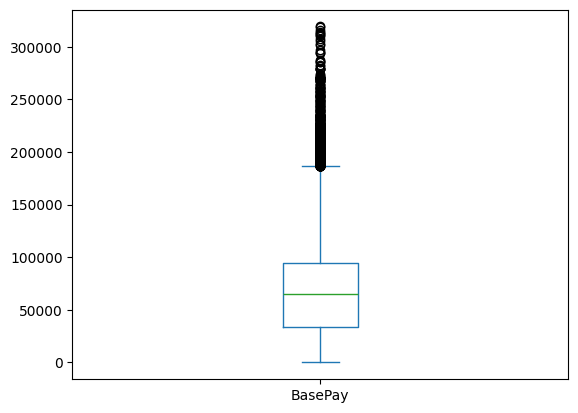

In [9]:
# visualización de outliers con boxplot
df['BasePay'].plot(kind='box')

## Conclusiones del analisis
1. Los valores extremos elevan la mediana, haciendo que no represente bien el sueldo típico.
2. La mediana está más cerca del Q1 que del Q3, lo que indica que hay más valores concentrados en la parte baja.
3. El bigote superior es mucho más largo que el inferior, lo que indica que hay más dispersión en los valores altos.

## Archivo nuevo con datos limpios

In [ ]:
# google colab (Camila Reyes)
from google.colab import files
files.download("Salaries_clean.csv")


In [ ]:
# local vscode (Claudio)
out_path = "Salaries_clean.csv"
df.to_csv(out_path, index=False)

print("Archivo guardado en:", out_path)